# 광고 시청시간 및 노출빈도에 따른 소비자 행태 조사

- 사용 데이터 : 2019년 소비자행태조사 원시데이터
- 데이터 출처
    - 소비자행태조사(MCR) 데이터 서비스 
    - (https://adstat.kobaco.co.kr/mcr/portal/dataSet/mdssInfoPage.do?orderState=regDt&pageSize=10&pageIndex=1&searchItem=all&searchText=&datasetId=DS_MST_0000000422#popup_window_reason)
- 분석 목적 : 
광고 시청시간 및 노출빈도에 따라 소비자의 구매욕구가 유의하게 변하는지 알아보고자 한다.

- 분석 변수
---
- TV 변수
    - 설명 변수
        - X : 광고 시청시간
        (광고 매체 - TV)
    - 반응 변수
        - Y : 광고 관심도,
              광고 시청 집중도,
              PPL(간접광고) 평가
              
- Online 변수
    - 설명 변수
        - X : 광고 시청 경험 여부
        (광고 매체 - Online)
    - 반응 변수
        - Y : 동영상 광고 동의 정도

- PC 변수
    - 설명 변수
        - X : 광고 시청시간
        (광고 매체 - PC)
    - 반응 변수
        - Y : PC 인터넷 광고 집중도
        
- Mobile 변수
    - 설명 변수
        - X : 모바일 광고 주목도
        (광고 매체 - Mobile)
    - 반응 변수
        - Y : 광고 관심도,
              광고 집중도
        
- SNS 변수
    - 설명 변수
        - X : 광고 주목도
        (광고 매체 - SNS)
    - 반응 변수
        - Y : 광고 관심도,
              광고 인식

# 분석 준비

In [17]:
import pandas as pd
import numpy as np
import os
import re

# 시각화를 위한 패키지
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import missingno as msno

In [19]:
os.chdir(r"E:\개인공부\청년취업아카데미\미니프로젝트\Mini_Project_final\data")
os.getcwd()

'C:\\Users\\LGR7\\Desktop\\미니프로젝트\\Mini Project\\data'

# Load data

In [20]:
df_ans = pd.read_csv("MCR2019_답변정보.csv")
df_fea = pd.read_csv("최종 변수 선택.csv", header=None)
df_opt = pd.read_csv("MCR2019_보기정보.csv")

print("답변 정보 : ", df_ans.shape)
print("추출 변수 : ", df_fea.shape)
print("보기 정보 : ", df_opt.shape)

답변 정보 :  (4001, 3619)
추출 변수 :  (40, 2)
보기 정보 :  (45603, 6)


In [21]:
df_ans.head()

,YEAR,A_001,A_002,A_003,A_004,A_006,A_007,A_009,A_011,A_013,...,K_05_015#1,K_05_015#2,K_05_015#3,K_05_015#4,K_05_015#5,K_05_015#6,K_05_015#7,K_05_015#8,K_05_015#9,K_05_015#10
0,조사년도,성별,연령(10대),연령(1세),지역(권역),직업,가구 월평균 소득(1),본인 월평균 소득(1),한 달 평균 지출액 (신용카드+체크카드),최종학력,...,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠,평소 즐겨 보는 뉴스 및 콘텐츠
1,2019,1,1,14,1,6,6,NaN,1,8,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,14,1,6,6,NaN,99,8,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,14,1,6,6,NaN,1,8,...,3,6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,14,1,6,8,NaN,99,8,...,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_fea.columns = ['NO', '내용']
df_fea.head()

,NO,내용
0,C_01_011,TV 시청 중 광고 시청 정도
1,C_01_012,TV 시청 중 광고 관심도
2,C_01_014,프로그램 전 광고 시청 집중도
3,C_01_015,프로그램 후 광고 시청 집중도
4,C_01_016,중간광고 시청 집중도


In [23]:
col_list = [c for c in df_ans.columns if c in df_fea.NO.values] # 변수 추출

df = df_ans[col_list]
df = pd.DataFrame(df)
df = df.loc[1:, :]

df.shape

(4000, 40)

## 변수 정보

In [24]:
df_fea

,NO,내용
0,C_01_011,TV 시청 중 광고 시청 정도
1,C_01_012,TV 시청 중 광고 관심도
2,C_01_014,프로그램 전 광고 시청 집중도
3,C_01_015,프로그램 후 광고 시청 집중도
4,C_01_016,중간광고 시청 집중도
5,C_01_017,PPL광고(간접광고) 시청 집중도
6,C_01_018,가상광고 시청 집중도
7,C_01_019,PPL(간접광고) 평가 - 제품/브랜드 관심도
8,C_01_020,PPL(간접광고) 평가 - 제품/브랜드 인지
9,C_01_021,PPL(간접광고) 평가 - 제품/브랜드의 이미지 향상


# Pre-processing

## select Feature

Load data에서 완료.

In [25]:
df.shape

(4000, 40)

In [26]:
df.head()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
1,2,2,5,4,4,6,6,6,6,6,...,4,3,5,5,NaN,NaN,NaN,3,4,2
2,2,2,3,2,2,2,3,3,4,2,...,4,5,4,5,NaN,NaN,NaN,5,5,4
3,1,1,5,5,6,6,5,5,4,5,...,NaN,NaN,NaN,NaN,2,2,4,4,5,4
4,3,4,3,3,3,3,3,2,2,2,...,NaN,NaN,NaN,NaN,3,4,2,4,3,3
5,2,2,5,4,4,4,3,6,6,5,...,5,5,6,4,3,3,2,3,2,1


In [27]:
df.tail()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
3996,2,3,2,3,3,4,4,4,5,4,...,3,4,4,3,2,3,3,4,3,4
3997,3,3,3,3,3,3,2,3,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,4
3998,2,3,4,5,4,3,4,4,3,5,...,NaN,NaN,NaN,NaN,2,3,3,3,4,4
3999,2,3,3,3,4,3,3,3,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4
4000,3,3,3,3,4,3,3,4,3,3,...,NaN,NaN,NaN,NaN,3,3,2,5,3,3


## missing value

In [28]:
# 결측치가 존재하는 컬럼, 결측치 비율
df_miss = df.isnull().sum().reset_index()
df_miss.columns = ['column', 'count']
df_miss['ratio'] = round(df_miss['count']/len(df)*100, 1)
df_miss.loc[df_miss['ratio'] != 0]

,column,count,ratio
1,C_01_012,316,7.9
2,C_01_014,316,7.9
3,C_01_015,316,7.9
4,C_01_016,316,7.9
5,C_01_017,316,7.9
6,C_01_018,316,7.9
16,C_12_029,1397,34.9
17,C_12_031,1664,41.6
18,C_12_034,1664,41.6
19,C_12_035,1664,41.6


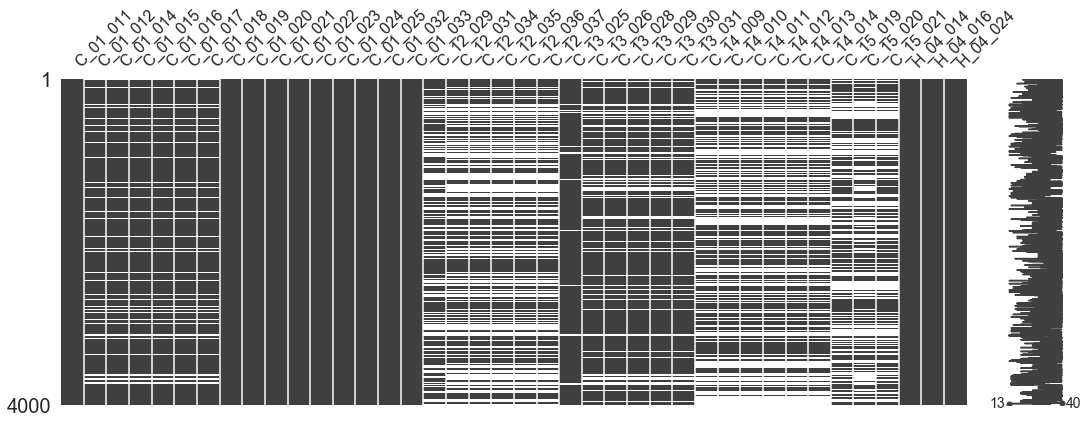

In [29]:
msno.matrix(df, figsize=(18,6))

- Ex) C_01_012 부터 C_01_018 까지의 결측값
    - 바로 전 C_01_011 질문
    - Q. 귀하께서는 평소 TV를 시청하시면서 프로그램 전/중간/후에 나오는 광고를 얼마나 많이 보시는 편입니까?
    - A. '전혀 관심있게 보지 않는다.' 로 응답한 설문
    - TV 매체로 분석 시 제외하고 분석
---
- -> 나머지 결측값도 위와 마찬가지로 다른 값으로 대체하지 않고 제외하고 분석

## unique value

In [30]:
df.describe()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
count,4000,3684.0,3684.0,3684.0,3684.0,3684.0,3684.0,4000,4000,4000,...,2216.0,2216.0,2216.0,2216.0,2473.0,2257.0,2473.0,4000,4000,4000
unique,8,8.0,12.0,12.0,12.0,12.0,12.0,12,12,12,...,13.0,13.0,13.0,13.0,9.0,9.0,13.0,12,12,12
top,2,3.0,3.0,3.0,4.0,3.0,3.0,3,4,3,...,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4,4,4
freq,1878,2299.0,1434.0,1540.0,1157.0,1393.0,1524.0,1416,1641,1314,...,750.0,776.0,723.0,727.0,1128.0,1444.0,839.0,1573,1648,1587


-> unique 값이 보기 개수와 다름, 확인 요망

In [31]:
len(re.findall(" ", str(df))) # 1850개 공백 존재

1850

In [32]:
for x in df.columns: # 공백 제거
    df[x] = df[x].str.strip()
    
df.describe()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021,...,C_14_011,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
count,255,224,224,224,224,224,224,255,255,255,...,350,350,350,350,375,353,375,255,255,255
unique,4,4,6,6,6,6,6,6,6,6,...,7,7,7,7,5,5,7,6,6,6
top,2,3,3,3,3,3,3,3,4,3,...,3,3,3,3,3,3,2,4,4,4
freq,113,157,93,107,80,97,106,106,121,95,...,153,164,155,154,203,264,164,86,101,100


-> 아직 이상한 값이 있다. 확인 요망

In [33]:
df.C_14_011.unique() # '#NULL!' 값 존재

array(['4', nan, '5', '2', '3', '1', '6', '#NULL!'], dtype=object)

In [34]:
df = df.replace("#NULL!", np.nan) # '#NULL' 값 제거

df[df.columns[:10]].describe()

,C_01_011,C_01_012,C_01_014,C_01_015,C_01_016,C_01_017,C_01_018,C_01_019,C_01_020,C_01_021
count,255,224,224,224,224,224,224,255,255,255
unique,4,4,6,6,6,6,6,6,6,6
top,2,3,3,3,3,3,3,3,4,3
freq,113,157,93,107,80,97,106,106,121,95


In [35]:
df[df.columns[11:20]].describe()

,C_01_023,C_01_024,C_01_025,C_01_032,C_01_033,C_12_029,C_12_031,C_12_034,C_12_035
count,255,255,255,255,255,220,201,201,201
unique,6,6,6,2,2,4,4,6,6
top,3,3,3,2,2,3,3,3,3
freq,114,100,85,178,200,127,158,93,91


In [36]:
df[df.columns[21:30]].describe()

,C_12_037,C_13_025,C_13_026,C_13_028,C_13_029,C_13_030,C_13_031,C_14_009,C_14_010
count,201,251,222,222,222,222,222,349,349
unique,6,4,4,5,6,6,6,6,6
top,3,3,3,3,3,3,2,3,4
freq,89,135,172,109,91,82,81,152,154


In [37]:
df[df.columns[31:]].describe()

,C_14_012,C_14_013,C_14_014,C_15_019,C_15_020,C_15_021,H_04_014,H_04_016,H_04_024
count,349,349,349,374,352,374,255,255,255
unique,6,6,6,4,4,6,6,6,6
top,3,3,3,3,3,2,4,4,4
freq,164,155,154,203,264,164,86,101,100


-> 보기 개수와 모두 일치!

## data type

In [38]:
df.dtypes

C_01_011    object
C_01_012    object
C_01_014    object
C_01_015    object
C_01_016    object
C_01_017    object
C_01_018    object
C_01_019    object
C_01_020    object
C_01_021    object
C_01_022    object
C_01_023    object
C_01_024    object
C_01_025    object
C_01_032    object
C_01_033    object
C_12_029    object
C_12_031    object
C_12_034    object
C_12_035    object
C_12_036    object
C_12_037    object
C_13_025    object
C_13_026    object
C_13_028    object
C_13_029    object
C_13_030    object
C_13_031    object
C_14_009    object
C_14_010    object
C_14_011    object
C_14_012    object
C_14_013    object
C_14_014    object
C_15_019    object
C_15_020    object
C_15_021    object
H_04_014    object
H_04_016    object
H_04_024    object
dtype: object

-> 순서형 척도(이산형)로 변환, but, 해석에 유의

In [39]:
df = df.fillna(0) # nan을 0으로 변환
for c in df.columns:
    df.loc[:, c] = df.loc[:, c].astype('int') # int 로 변환
    
df.dtypes

C_01_011    int32
C_01_012    int32
C_01_014    int32
C_01_015    int32
C_01_016    int32
C_01_017    int32
C_01_018    int32
C_01_019    int32
C_01_020    int32
C_01_021    int32
C_01_022    int32
C_01_023    int32
C_01_024    int32
C_01_025    int32
C_01_032    int32
C_01_033    int32
C_12_029    int32
C_12_031    int32
C_12_034    int32
C_12_035    int32
C_12_036    int32
C_12_037    int32
C_13_025    int32
C_13_026    int32
C_13_028    int32
C_13_029    int32
C_13_030    int32
C_13_031    int32
C_14_009    int32
C_14_010    int32
C_14_011    int32
C_14_012    int32
C_14_013    int32
C_14_014    int32
C_15_019    int32
C_15_020    int32
C_15_021    int32
H_04_014    int32
H_04_016    int32
H_04_024    int32
dtype: object

# Visualization & EDA(Exploratory Data Analysis)

## Mobile & SNS

In [40]:
usedata = df_ans.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033','C_14_007','C_14_009','C_14_010','C_14_011','C_14_012','C_14_013','C_14_014','H_04_014','H_04_016','H_04_024','C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037','C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031','C_15_019','C_15_020','C_15_021']]

In [41]:
#모바일 추출
moblie = usedata.loc[:,['C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031']]
  
#결측값 제거
usemoblie = moblie.dropna(axis=0)

# 1행 제거
usemoblie = usemoblie.loc[1:]

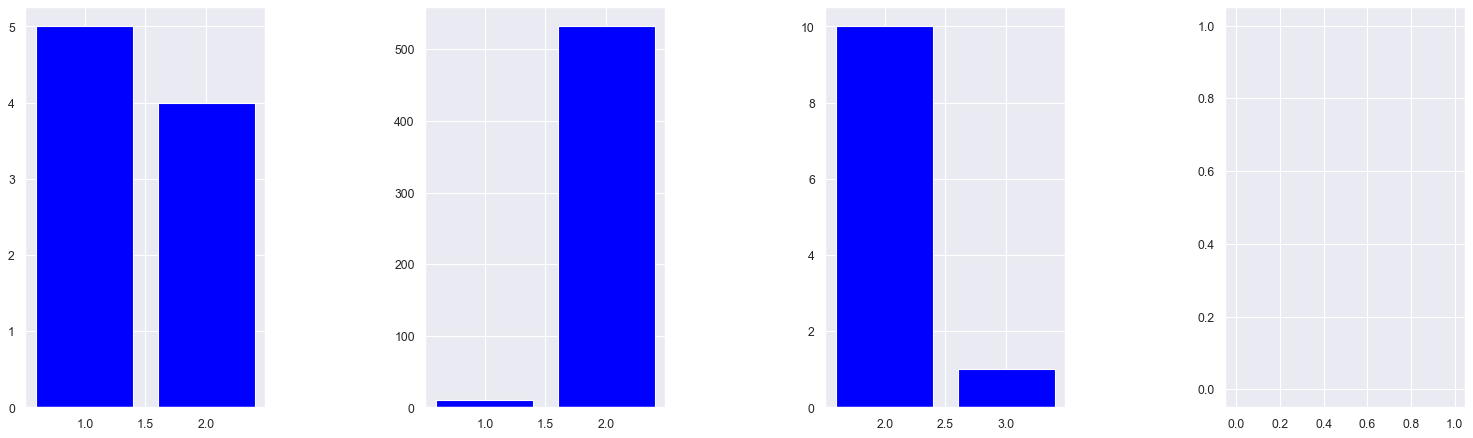

In [42]:
#모바일 주목도별 관심도 선택 도수분포표
a1=usemoblie.C_13_026[usemoblie.C_13_025 ==1].value_counts()
a2=usemoblie.C_13_026[usemoblie.C_13_025 ==2].value_counts()
a3=usemoblie.C_13_026[usemoblie.C_13_025 ==3].value_counts()
a4=usemoblie.C_13_026[usemoblie.C_13_025 ==4].value_counts()

#모바일 주목도별 관심도 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])
axes1.bar(a1.index,a1.values,color='blue')
axes2.bar(a2.index,a2.values,color='blue')
axes3.bar(a3.index,a3.values,color='blue')
axes4.bar(a4.index,a4.values,color='blue')

plt.show()

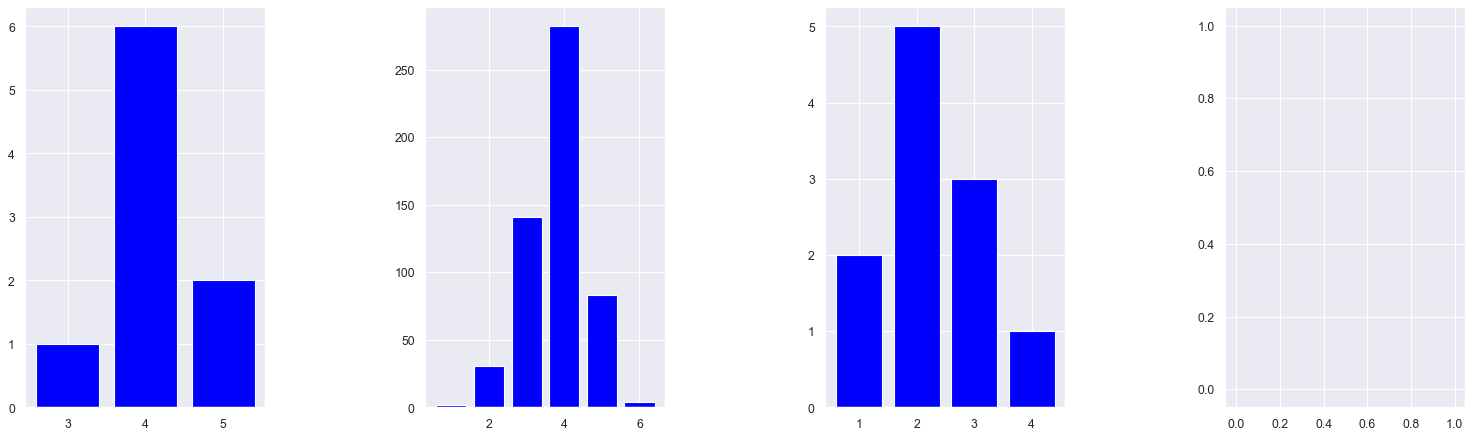

In [43]:
#모바일 주목도별 배너광고집중도 선택 도수분포표
b1=usemoblie.C_13_028[usemoblie.C_13_025 ==1].value_counts() 
b2=usemoblie.C_13_028[usemoblie.C_13_025 ==2].value_counts()
b3=usemoblie.C_13_028[usemoblie.C_13_025 ==3].value_counts()
b4=usemoblie.C_13_028[usemoblie.C_13_025 ==4].value_counts()

#모바일 주목도별 배너광고집중도 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])

axes1.bar(b1.index,b1.values,color='blue')
axes2.bar(b2.index,b2.values,color='blue')
axes3.bar(b3.index,b3.values,color='blue')
axes4.bar(b4.index,b4.values,color='blue')

plt.show()

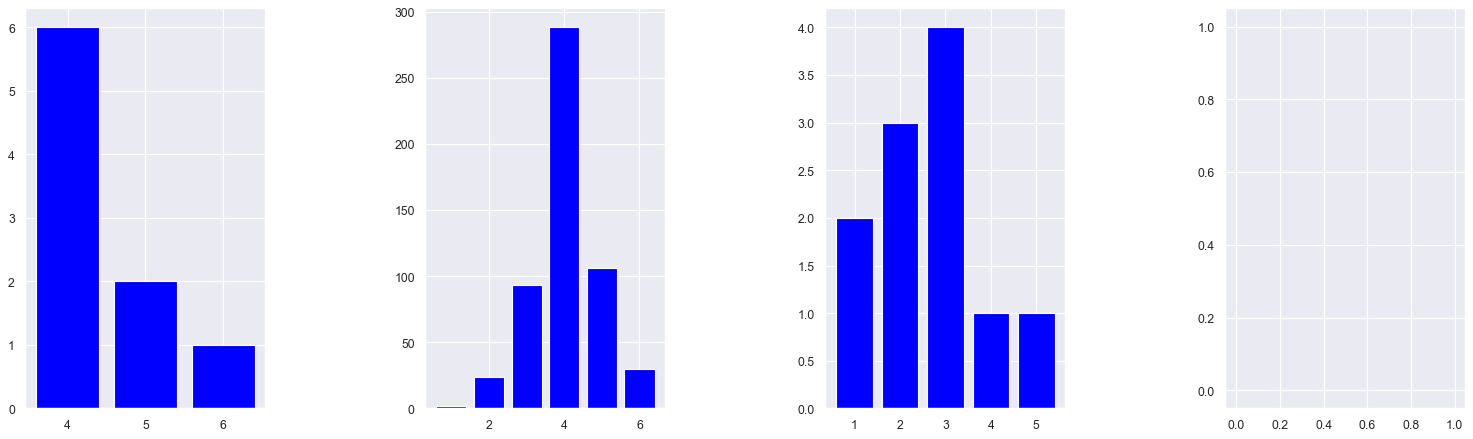

In [44]:
#모바일 주목도별 동영상광고 집중도 선택 도수분포표
c1=usemoblie.C_13_029[usemoblie.C_13_025 ==1].value_counts() 
c2=usemoblie.C_13_029[usemoblie.C_13_025 ==2].value_counts()
c3=usemoblie.C_13_029[usemoblie.C_13_025 ==3].value_counts()
c4=usemoblie.C_13_029[usemoblie.C_13_025 ==4].value_counts()

#모바일 주목도별 동영상 광고집중도 바차트
fig=plt.figure(figsize=(10,5),dpi=80)   
axes1=fig.add_axes([0,0,0.3,1])
axes2=fig.add_axes([0.5,0,0.3,1])
axes3=fig.add_axes([1.0,0,0.3,1])
axes4=fig.add_axes([1.5,0,0.3,1])

axes1.bar(c1.index,c1.values,color='blue')
axes2.bar(c2.index,c2.values,color='blue')
axes3.bar(c3.index,c3.values,color='blue')
axes4.bar(c4.index,c4.values,color='blue')

plt.show()

## TV & PC

In [45]:
#tv만 추출
tv = usedata.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033','H_04_016']]

usetv = tv.dropna(axis=0)   #결측값 제거
usetv = usetv.iloc[1:]      #wColumn 질문 설명 제거

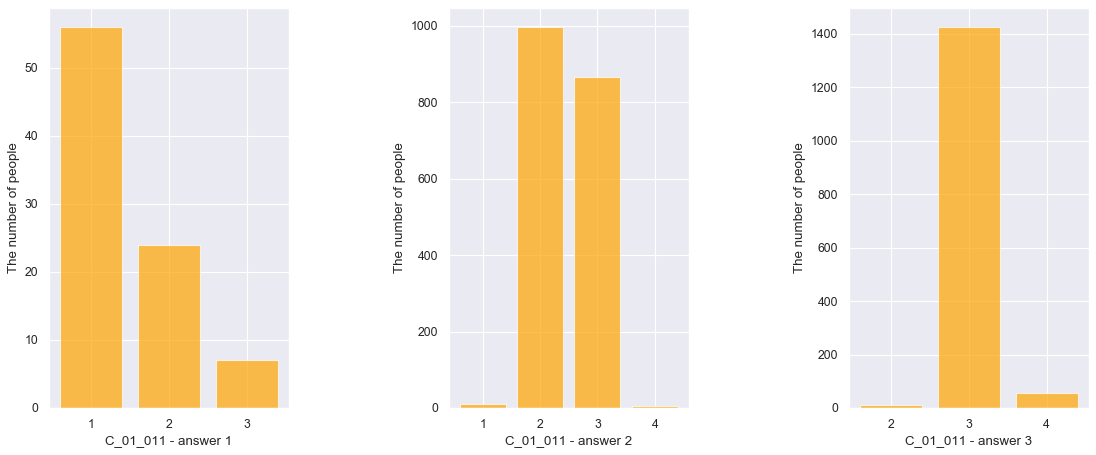

In [46]:
## TV광고 시청 정도에 따른 TV광고 관심도 (1: 많이 봄, 3: 거의 보지 않음)

ex_1 = usetv.C_01_012[usetv.C_01_011 == 1].value_counts()    ## TV광고를 많이 보는 집단
ex_2 = usetv.C_01_012[usetv.C_01_011 == 2].value_counts()    ## TV광고를 어느정도 보는 집단
ex_3 = usetv.C_01_012[usetv.C_01_011 == 3].value_counts()    ## TV광고를 별로 보지 않는 집단

## C_01_012에 대한 답변 (1 : 매우 관심 있게 봄, 4 : 전혀 관심 있게 보지 않음)

fig = plt.figure(figsize=(10,5), dpi = 80)
axes1 = fig.add_axes([0, 0, 0.3, 1])
axes2 = fig.add_axes([0.5, 0, 0.3, 1])
axes3 = fig.add_axes([1.0, 0, 0.3, 1])
axes1.bar(ex_1.index, ex_1.values, color = 'orange', alpha=0.7)
axes2.bar(ex_2.index, ex_2.values, color = 'orange', alpha=0.7)
axes3.bar(ex_3.index, ex_3.values, color = 'orange', alpha=0.7)
axes1.set_xlabel('C_01_011 - answer 1')
axes1.set_ylabel('The number of people')
axes2.set_xlabel('C_01_011 - answer 2')
axes2.set_ylabel('The number of people')
axes3.set_xlabel('C_01_011 - answer 3')
axes3.set_ylabel('The number of people')
plt.show()

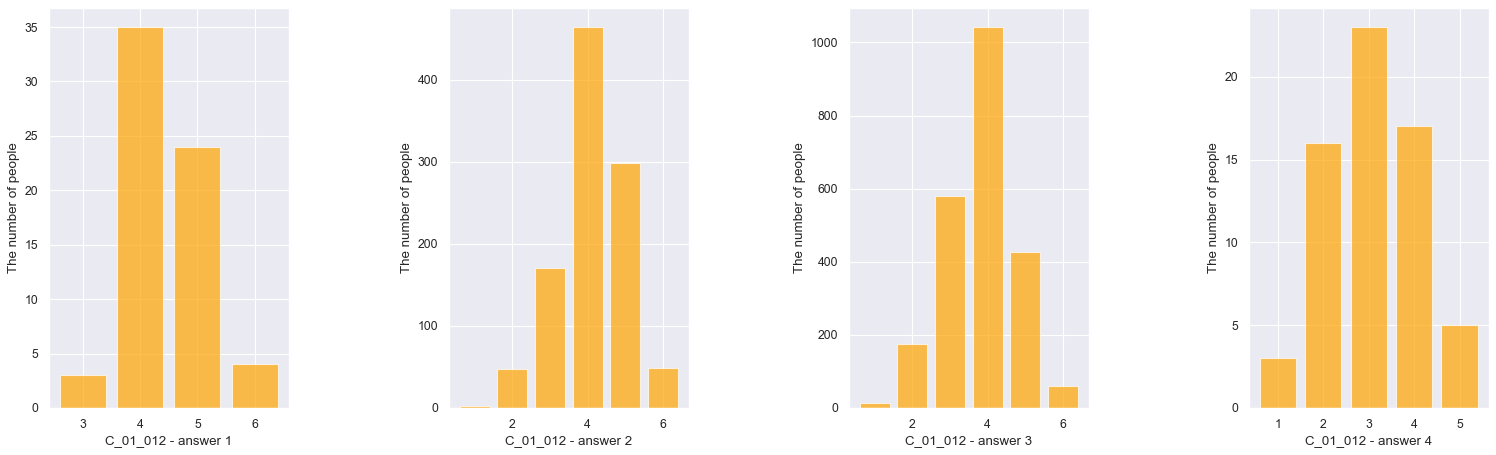

In [47]:
## TV광고 관심도가 제품 구매 의사결정에 영향을 끼치는지. (1 : 매우 관심 있게 봄, 4 : 전혀 관심 있게 보지 않음)

in_1 = usetv.H_04_016[usetv.C_01_012 == 1].value_counts()
in_2 = usetv.H_04_016[usetv.C_01_012 == 2].value_counts()
in_3 = usetv.H_04_016[usetv.C_01_012 == 3].value_counts()
in_4 = usetv.H_04_016[usetv.C_01_012 == 4].value_counts()

## H_04_016의 답변 (1: 전혀 아니다, 6: 매우 그렇다)

fig = plt.figure(figsize=(10,5), dpi = 80)
axes4 = fig.add_axes([0, 0, 0.3, 1])
axes5 = fig.add_axes([0.5, 0, 0.3, 1])
axes6 = fig.add_axes([1.0, 0, 0.3, 1])
axes7 = fig.add_axes([1.5, 0, 0.3, 1])

axes4.bar(in_1.index, in_1.values, color = 'orange', alpha=0.7)
axes5.bar(in_2.index, in_2.values, color = 'orange', alpha=0.7)
axes6.bar(in_3.index, in_3.values, color = 'orange', alpha=0.7)
axes7.bar(in_4.index, in_4.values, color = 'orange', alpha=0.7)
axes4.set_xlabel('C_01_012 - answer 1')
axes4.set_ylabel('The number of people')
axes5.set_xlabel('C_01_012 - answer 2')
axes5.set_ylabel('The number of people')
axes6.set_xlabel('C_01_012 - answer 3')
axes6.set_ylabel('The number of people')
axes7.set_xlabel('C_01_012 - answer 4')
axes7.set_ylabel('The number of people')
plt.show()

# Modeling

## 피어슨 상관분석

In [48]:
rawdata2 = pd.read_csv("rawdata(수정).csv")
df = rawdata2.copy()

In [49]:
usedata=df.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033','C_14_007','C_14_009','C_14_010','C_14_011','C_14_012','C_14_013','C_14_014','H_04_014','H_04_016','H_04_024','C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037','C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031','C_15_019','C_15_020','C_15_021']]

In [50]:
tv=usedata.loc[:,['C_01_011','C_01_012','C_01_014','C_01_015','C_01_016','C_01_017','C_01_018','C_01_019','C_01_020','C_01_021','C_01_022','C_01_023','C_01_024','C_01_025','C_01_033']]
#tv.head() 
#tv만 추출

In [51]:
usetv=tv.dropna(axis=0) #결측값 제거
#usetv.head()

In [52]:
online=usedata.loc[:,['C_14_007','C_14_009','C_14_010','C_14_011','C_14_012','C_14_013','C_14_014']]
#online.head()
#온라인 추출

In [53]:
useonline=online.dropna(axis=0) #결측값 제거
#useonline.head()

In [54]:
pc=usedata.loc[:,['C_12_029','C_12_031','C_12_033','C_12_034','C_12_035','C_12_036','C_12_037']]
#pc.head()
#pc 추출

In [55]:
usepc=pc.dropna(axis=0) #결측값 제거
#usepc.head()

In [56]:
moblie=usedata.loc[:,['C_13_025','C_13_026','C_13_027','C_13_028','C_13_029','C_13_030','C_13_031']]
#moblie.head()
#모바일 추출

In [57]:
usemoblie=moblie.dropna(axis=0) #결측값 제거
#usemoblie.head()

In [58]:
sns_df=usedata.loc[:,['C_15_019','C_15_020','C_15_021']]
#sns_df.head()
#sns 추출

In [59]:
usesns=sns_df.dropna(axis=0) #결측값 제거
#usesns.head()
usesns = pd.DataFrame(usesns)

In [60]:
a=usedata.loc[:,['H_04_014','H_04_016','H_04_024']]
#a.head()

In [61]:
usea=a.dropna(axis=0) #결측값 제거
#usea.head()

In [62]:
etc=usedata.loc[:,['C_01_011','H_04_014','H_04_016','H_04_024']]

In [63]:
useetc=etc.dropna(axis=0) #결측값 제거
#useetc.head()

In [64]:
# usetv의 C_01_011(TV 시청 중 광고 시청 정도)와 나머지 변수들끼리의 상관계수
corr_tv = usetv.corrwith(usetv.C_01_011, method = 'pearson') 
# 데이터프레임으로 바꾸기
corr_tv = pd.DataFrame(corr_tv) 
corr_tv

,0
C_01_011,1.000000
C_01_012,0.620370
C_01_014,-0.475642
C_01_015,-0.457650
C_01_016,-0.417002
C_01_017,-0.435553
C_01_018,-0.412817
C_01_019,-0.443244
C_01_020,-0.352019
C_01_021,-0.359107


In [65]:
# 상관계수 절댓값으로 바꾸기
temp_tv = corr_tv.copy() 

i = 0
for x in temp_tv.values:
    x = abs(x)
    temp_tv.values[i] = x
    i += 1
print(temp_tv)

                 0
C_01_011  1.000000
C_01_012  0.620370
C_01_014  0.475642
C_01_015  0.457650
C_01_016  0.417002
C_01_017  0.435553
C_01_018  0.412817
C_01_019  0.443244
C_01_020  0.352019
C_01_021  0.359107
C_01_022  0.387140
C_01_023  0.408184
C_01_024  0.398985
C_01_025  0.361247
C_01_033  0.149392


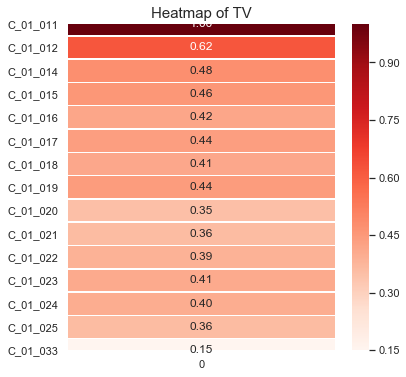

In [66]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_tv, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of TV', fontsize=15)
plt.show() 

### 상관관계 해석
- ±0 ~ 0.4 : 상관관계가 없다고 판단
- ±0.4 ~ 0.7 : 어느정도 상관관계가 있다
- ±0.7 ~ 1.0 : 뚜렷한 상관관계가 있다.

###  TV 광고

- C_01_012(귀하께서 평소 TV를 시청하실 때 광고가 나오면 광고를 얼마나 관심 있게 보십니까?) 
    - Cor 0.6
    - -> 양의 상관관계 -> '관심있게 보지 않는다'
---
- C_01_014(귀하께서는 TV 프로그램을 시청하실 때 접하는 광고들을 얼마나 집중해서 보십니까? - 프로그램 전 광고) 
    - Cor -0.48
    - -> 음의 상관관계 -> '집중해서 보지 않는다'
---
-  C_01_015(귀하께서는 TV 프로그램을 시청하실 때 접하는 광고들을 얼마나 집중해서 보십니까? - 프로그램 후 광고) 
    - Cor -0.46
    - -> 음의 상관관계 -> '집중해서 보지 않는다'

In [67]:
# usepc의 C_12_029(귀하께서는 평소 PC를 통해 인터넷을 이용하시면서 광고(배너광고, 동영상광고, 팝업광고, 검색광고, SNS광고 등을 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_pc = usepc.corrwith(usepc.C_12_029, method = 'pearson') 
corr_pc = pd.DataFrame(corr_pc)
corr_pc

,0
C_12_029,1.000000
C_12_031,0.008280
C_12_033,0.049182
C_12_034,-0.110693
C_12_035,-0.106921
C_12_036,-0.109980
C_12_037,-0.155239


In [68]:
# 상관계수 절댓값으로 바꾸기
temp_pc = corr_pc.copy() 

i = 0
for x in temp_pc.values:
    x = abs(x)
    temp_pc.values[i] = x
    i += 1
print(temp_pc)

                 0
C_12_029  1.000000
C_12_031  0.008280
C_12_033  0.049182
C_12_034  0.110693
C_12_035  0.106921
C_12_036  0.109980
C_12_037  0.155239


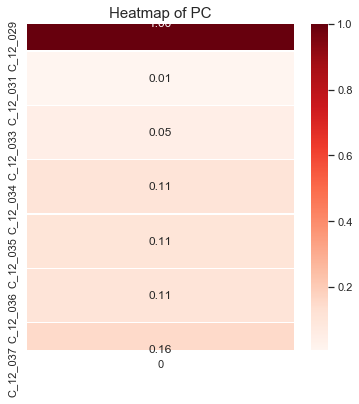

In [69]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_pc, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of PC', fontsize=15)
plt.show() 

### PC 광고
 유의한 상관계수 없음

In [70]:
# usemobile의 C_13_025(귀하께서는 평소 모바일 기기(스마트폰/태블릿PC)를 통해 인터넷을 하실 때 광고를 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_mobile = usemoblie.corrwith(usemoblie.C_13_025, method = 'pearson') 
corr_mobile = pd.DataFrame(corr_mobile)
corr_mobile

,0
C_13_025,1.000000
C_13_026,0.295098
C_13_027,0.094486
C_13_028,-0.222774
C_13_029,-0.187006
C_13_030,-0.184022
C_13_031,-0.126069


In [71]:
# 상관계수 절댓값으로 바꾸기
temp_mobile = corr_mobile.copy() 

i = 0
for x in temp_mobile.values:
    x = abs(x)
    temp_mobile.values[i] = x
    i += 1
print(temp_mobile)

                 0
C_13_025  1.000000
C_13_026  0.295098
C_13_027  0.094486
C_13_028  0.222774
C_13_029  0.187006
C_13_030  0.184022
C_13_031  0.126069


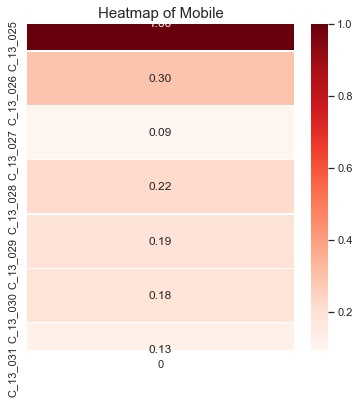

In [72]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_mobile, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of Mobile', fontsize=15)
plt.show() 

### Mobile 광고

- C_13_026(귀하께서 평소 모바일 기기(스마트폰/태블릿PC)를 통해 인터넷을 하실 때 광고가 나오면 광고를 얼마나 관심 있게 보십니까?) 
    - Cor 0.3
    - -> 양의 상관관계 -> '관심있게 보지 않는다'

In [73]:
usesns.head()

,C_15_019,C_15_020,C_15_021
2,2.0,2.0,4.0
3,3.0,4.0,2.0
4,3.0,3.0,2.0
5,3.0,3.0,2.0
6,1.0,1.0,5.0


In [74]:
# usesns의 C_15_019(귀하께서는 평소 SNS(소셜 네트워크 서비스)를 이용하시면서 광고를 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_sns = usesns.corrwith(usesns.C_15_019, method = 'pearson') 
corr_sns = pd.DataFrame(corr_sns)
corr_sns

,0
C_15_019,1.000000
C_15_020,0.582641
C_15_021,-0.264399


In [75]:
# 상관계수 절댓값으로 바꾸기
temp_sns = corr_sns.copy() 

i = 0
for x in temp_sns.values:
    x = abs(x)
    temp_sns.values[i] = x
    i += 1
print(temp_sns)

                 0
C_15_019  1.000000
C_15_020  0.582641
C_15_021  0.264399


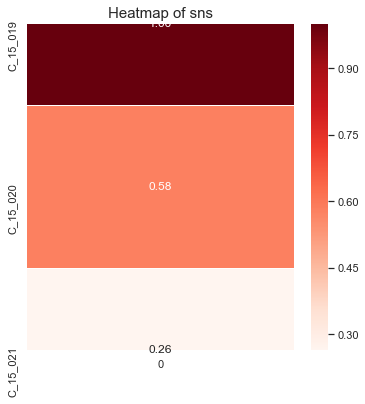

In [76]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_sns, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of sns', fontsize=15)
plt.show() 

### SNS 광고

- C_15_020(귀하께서는 평소 SNS(소셜 네트워크 서비스)를 이용하시면서 광고가 나오면 광고를 얼마나 관심 있게 보십니까?) 
    - Cor 0.58
    - -> 양의 상관관계 -> '관심있게 보지 않는다'

In [77]:
# useetc의 C_01_011(귀하께서는 평소 TV를 시청하시면서 프로그램 전/중간/후에 나오는 광고를 얼마나 많이 보시는 편입니까?)와 나머지 변수들끼리의 상관계수
corr_etc = useetc.corrwith(useetc.C_01_011, method = 'pearson') 
corr_etc = pd.DataFrame(corr_etc)
corr_etc

,0
C_01_011,1.000000
H_04_014,-0.227670
H_04_016,-0.286646
H_04_024,-0.220447


In [78]:
# 상관계수 절댓값으로 바꾸기
temp_etc = corr_etc.copy() 

i = 0
for x in temp_etc.values:
    x = abs(x)
    temp_etc.values[i] = x
    i += 1
print(temp_etc)

                 0
C_01_011  1.000000
H_04_014  0.227670
H_04_016  0.286646
H_04_024  0.220447


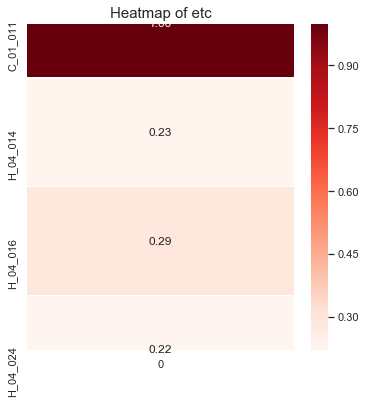

In [79]:
# 상관관계 heatmap
plt.figure(figsize = (6, 6))
sns.heatmap(data = temp_etc, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')
plt.title('Heatmap of etc', fontsize=15)
plt.show() 

## 

# Evaluate

1. 김경수. "인터넷 검색광고의 유형이 광고효과에 미치는 영향에 관한 연구" VOL.-  NO.- (2008)
http://www.riss.kr/search/detail/DetailView.do? p_mat_type=be54d9b8bc7cdb09&control_no=3f84529c4cbc09ceffe0bdc3ef48d419
-> 소비자들이 필요로 인해 광고를 검색하는 경우는 있지만, 
광고 자체가 소비를 일으키는 원인이 되지는 못했다.


2. 김정진. "뉴미디어 수용자의 능동성 정도에 따른 광고 태도 비교 연구" VOL.-  NO.- (2009)
http://www.riss.kr/search/detail/DetailView.do? p_mat_type=be54d9b8bc7cdb09&control_no=e2c9848b0bc9aa74ffe0bdc3ef48d41 9
-> 반복적이고 동일한 광고은 소비자들로 하여금 정보성과 오락성 대신 짜증도만  높일 수 있다.  이에 흥미를 유발할 수 있는 광고를 구성하고 노출하여 소비자들에게  긍정적인 인식을 심어줄 수 있어야 한다.